# Predicting Employee Productivity

### Headline Image

## Table ot Content

## Introduction

## Loading and Examining the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
df = pd.read_csv('garments_worker_productivity.csv')

# Clean column names: remove leading/trailing whitespace
df.columns = df.columns.str.strip()

# Display dataset overview
display(df.head())
print("="*55)
print(" GARMENTS WORKER PRODUCTIVITY DATASET OVERVIEW ")
print("="*55, "\n")
print(df.info(), "\n")

print("="*55)
print(" DATA SUMMARY ")
print("="*55, "\n")
print(df.describe().transpose(), "\n")

print("="*55)
print(" MISSING VALUES ")
print("="*55, "\n")
print(df.isnull().sum(), "\n")

print("="*55)
print(" DUPLICATE ROWS ")
print("="*55, "\n")
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


 GARMENTS WORKER PRODUCTIVITY DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_

In [2]:
# Print value counts for each column in a clean format
for col in df.columns:
    print("="*50)
    print(f" VALUE COUNTS FOR COLUMN: {col.upper()} ")
    print("="*50)
    print(df[col].value_counts(dropna=False).sort_index())
    print("\n")

 VALUE COUNTS FOR COLUMN: DATE 
date
1/1/2015     19
1/10/2015    22
1/11/2015    23
1/12/2015    23
1/13/2015    22
1/14/2015    21
1/15/2015    19
1/17/2015    21
1/18/2015    19
1/19/2015    19
1/20/2015    15
1/21/2015    19
1/22/2015    22
1/24/2015    23
1/25/2015    21
1/26/2015    19
1/27/2015    21
1/28/2015    21
1/29/2015    20
1/3/2015     21
1/31/2015    24
1/4/2015     21
1/5/2015     22
1/6/2015     21
1/7/2015     22
1/8/2015     22
2/1/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/14/2015    17
2/15/2015    19
2/16/2015    18
2/17/2015    20
2/18/2015    21
2/19/2015    20
2/2/2015     19
2/22/2015    20
2/23/2015    19
2/24/2015    19
2/25/2015    21
2/26/2015    21
2/28/2015    21
2/3/2015     19
2/4/2015     19
2/5/2015     18
2/7/2015     19
2/8/2015     19
2/9/2015     18
3/1/2015     20
3/10/2015    23
3/11/2015    24
3/2/2015     20
3/3/2015     22
3/4/2015     21
3/5/2015     19
3/7/2015     19
3/8/2015     22
3/9/2015     22
Name: count, dtype:

### 📊 Garments Worker Productivity Dataset Overview

The dataset contains **1197 records** with **15 columns**, representing daily production metrics for different garment manufacturing teams. It includes features such as scheduled targets, incentives, style changes, team composition, and actual productivity.

---

#### **Dataset Characteristics:**
- **Time Period:** Dates range from `MM-DD-YYYY` format, starting from January 2015.
- **Departments:** Two department types: `"sewing"` (note: originally misspelled as `"sweing"`) and `"finishing"`.
- **Team Info:** Data is grouped by team number (`team`), weekday (`day`), and monthly `quarter`.
- **Targets & Results:** 
  - `targeted_productivity` and `actual_productivity` both range from 0 to 1 (with a few values slightly over 1).
- **Labor & Work Metrics:**
  - `smv` (Standard Minute Value), `wip` (Work In Progress), `over_time`, and `incentive` measure work pressure and motivation.
  - `idle_time`, `idle_men`, and `no_of_style_change` reflect operational interruptions.
  - `no_of_workers` shows team size variation.

---

#### **Data Quality Checks:**
- ✅ **No duplicate rows** detected.
- ⚠️ **Missing values** found in:
  - `wip`: 506 missing entries (approx. 42%).
- ❌ **Typo detected** in `department`: `"sweing"` should be `"sewing"`.
- 🕒 `date` is currently a string and should be converted to datetime for time-based analysis.

## Data Cleaning & Preprocessing

In [3]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')

# Clean 'department': strip whitespaces and correct typos
df['department'] = df['department'].str.strip()
df['department'] = df['department'].replace('sweing', 'sewing')

# Remove outlier in 'targeted_productivity'
df = df[df['targeted_productivity'] != 0.07]

# Round 'no_of_workers' and convert to integer
df['no_of_workers'] = df['no_of_workers'].round().astype(int)

# Convert 'team' to string (categorical representation)
df['team'] = df['team'].astype(str)

### 🧹 Data Cleaning Steps

To improve data quality and prepare the dataset for modeling, the following preprocessing steps were applied:

---

#### ✅ 1. Convert `date` to datetime format

- This ensures the `date` column is treated as a proper datetime object, enabling time-based operations.

---

#### ✅ 2. Clean and correct values in `department`

- Removed any leading/trailing whitespace from values.
- Fixed a typo by replacing `"sweing"` with the correct label `"sewing"`.

---

#### ✅ 3. Remove an outlier from `targeted_productivity`

- The value `0.07` was an isolated low outlier, likely an error or an extreme case that could skew the model.

---

#### ✅ 4. Round and cast `no_of_workers` to integer

- Since the number of workers must be whole, fractional values like `30.5` were rounded and cast to integers.

---

#### ✅ 5. Convert `team` to string type

- Although stored as integers, `team` identifiers are categorical and shouldn't be treated as numeric during modeling. This conversion prevents unintended statistical interpretations.

In [4]:
df['quarter'] = df['quarter'].replace('Quarter5', 'Quarter4')

### 🛠️ Fixing Incorrect `quarter` Labels

During data exploration, I discovered that the `quarter` column — which is meant to represent **week groupings within a month** — contained an invalid label: `Quarter5`.

#### 🔍 What went wrong?
According to the dataset documentation, each month was divided into four quarters. However, a group of records dated **January 29th and 31st** were labeled as `Quarter5`, which is not defined in the dataset's structure. This likely happened because the original logic mistakenly assumed all months end on day 28 (as in February), causing days 29–31 to fall into an unnecessary fifth category.

#### ✅ Solution
All entries with `Quarter5` were **recoded as `Quarter4`**, which properly represents the final portion of each month. This correction ensures consistency with the dataset's intended structure and prevents misleading splits in the model based on incorrect temporal groupings.

In [5]:
# Drop uninformative and low-quality columns
df.drop(columns=['idle_time', 'idle_men', 'wip', 'no_of_style_change', 'incentive'], inplace=True)

### 🧹 Dropping Unnecessary Columns

To prepare the dataset for modeling, I dropped five columns that were either uninformative, highly imbalanced, or contained excessive missing values:

---

#### 🗑️ `idle_time` and `idle_men`

- Over **98%** of entries in both columns were `0`.
- No meaningful variance to help a model make splits or predictions.
- Likely to introduce noise rather than signal.

---

#### 🧩 `wip` (Work In Progress)

- Contained **42% missing values**.
- The non-missing values were **heavily skewed** and included extreme outliers (above 23,000).
- No clear connection to the target variable.
- Imputation would have introduced too much uncertainty.

---

#### 🎭 `no_of_style_change`

- Almost all values were `0`, with a max of `2`.
- **IQR = 0**, meaning no meaningful variability.

---

#### 💸 `incentive`

- Mostly zeroes, with a few very large values.
- Skewed distribution could bias models.
- No strong justification for keeping it.


## Exploratory Data Analysis

## Numerical Distributions and Outliers

In [6]:
# List of numerical columns in your dataset
numerical_columns = [
    'targeted_productivity',
    'smv',
    'over_time',
    'no_of_workers',
    'actual_productivity'
]

# Create a dataframe with summary statistics
summary_df = df[numerical_columns].describe().T

# Calculate IQR and outlier bounds
summary_df["IQR"] = summary_df["75%"] - summary_df["25%"]
summary_df["Lower Bound"] = summary_df["25%"] - 1.5 * summary_df["IQR"]
summary_df["Upper Bound"] = summary_df["75%"] + 1.5 * summary_df["IQR"]

# Display the summary statistics
display(summary_df)

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound
targeted_productivity,1196.0,0.730184,0.096053,0.350000,0.700000,0.750000,0.800000,0.800000,0.100000,0.550000,0.950000
smv,1196.0,15.054482,10.944561,2.900000,3.940000,15.260000,23.832500,54.560000,19.892500,-25.898750,53.671250
over_time,1196.0,4565.459866,3349.508875,0.000000,1440.000000,3960.000000,6937.500000,25920.000000,5497.500000,-6806.250000,15183.750000
no_of_workers,1196.0,34.576923,22.179412,2.000000,9.000000,34.000000,57.000000,89.000000,48.000000,-63.000000,129.000000
actual_productivity,1196.0,0.735269,0.174453,0.233705,0.650382,0.773333,0.850268,1.120437,0.199885,0.350555,1.150095


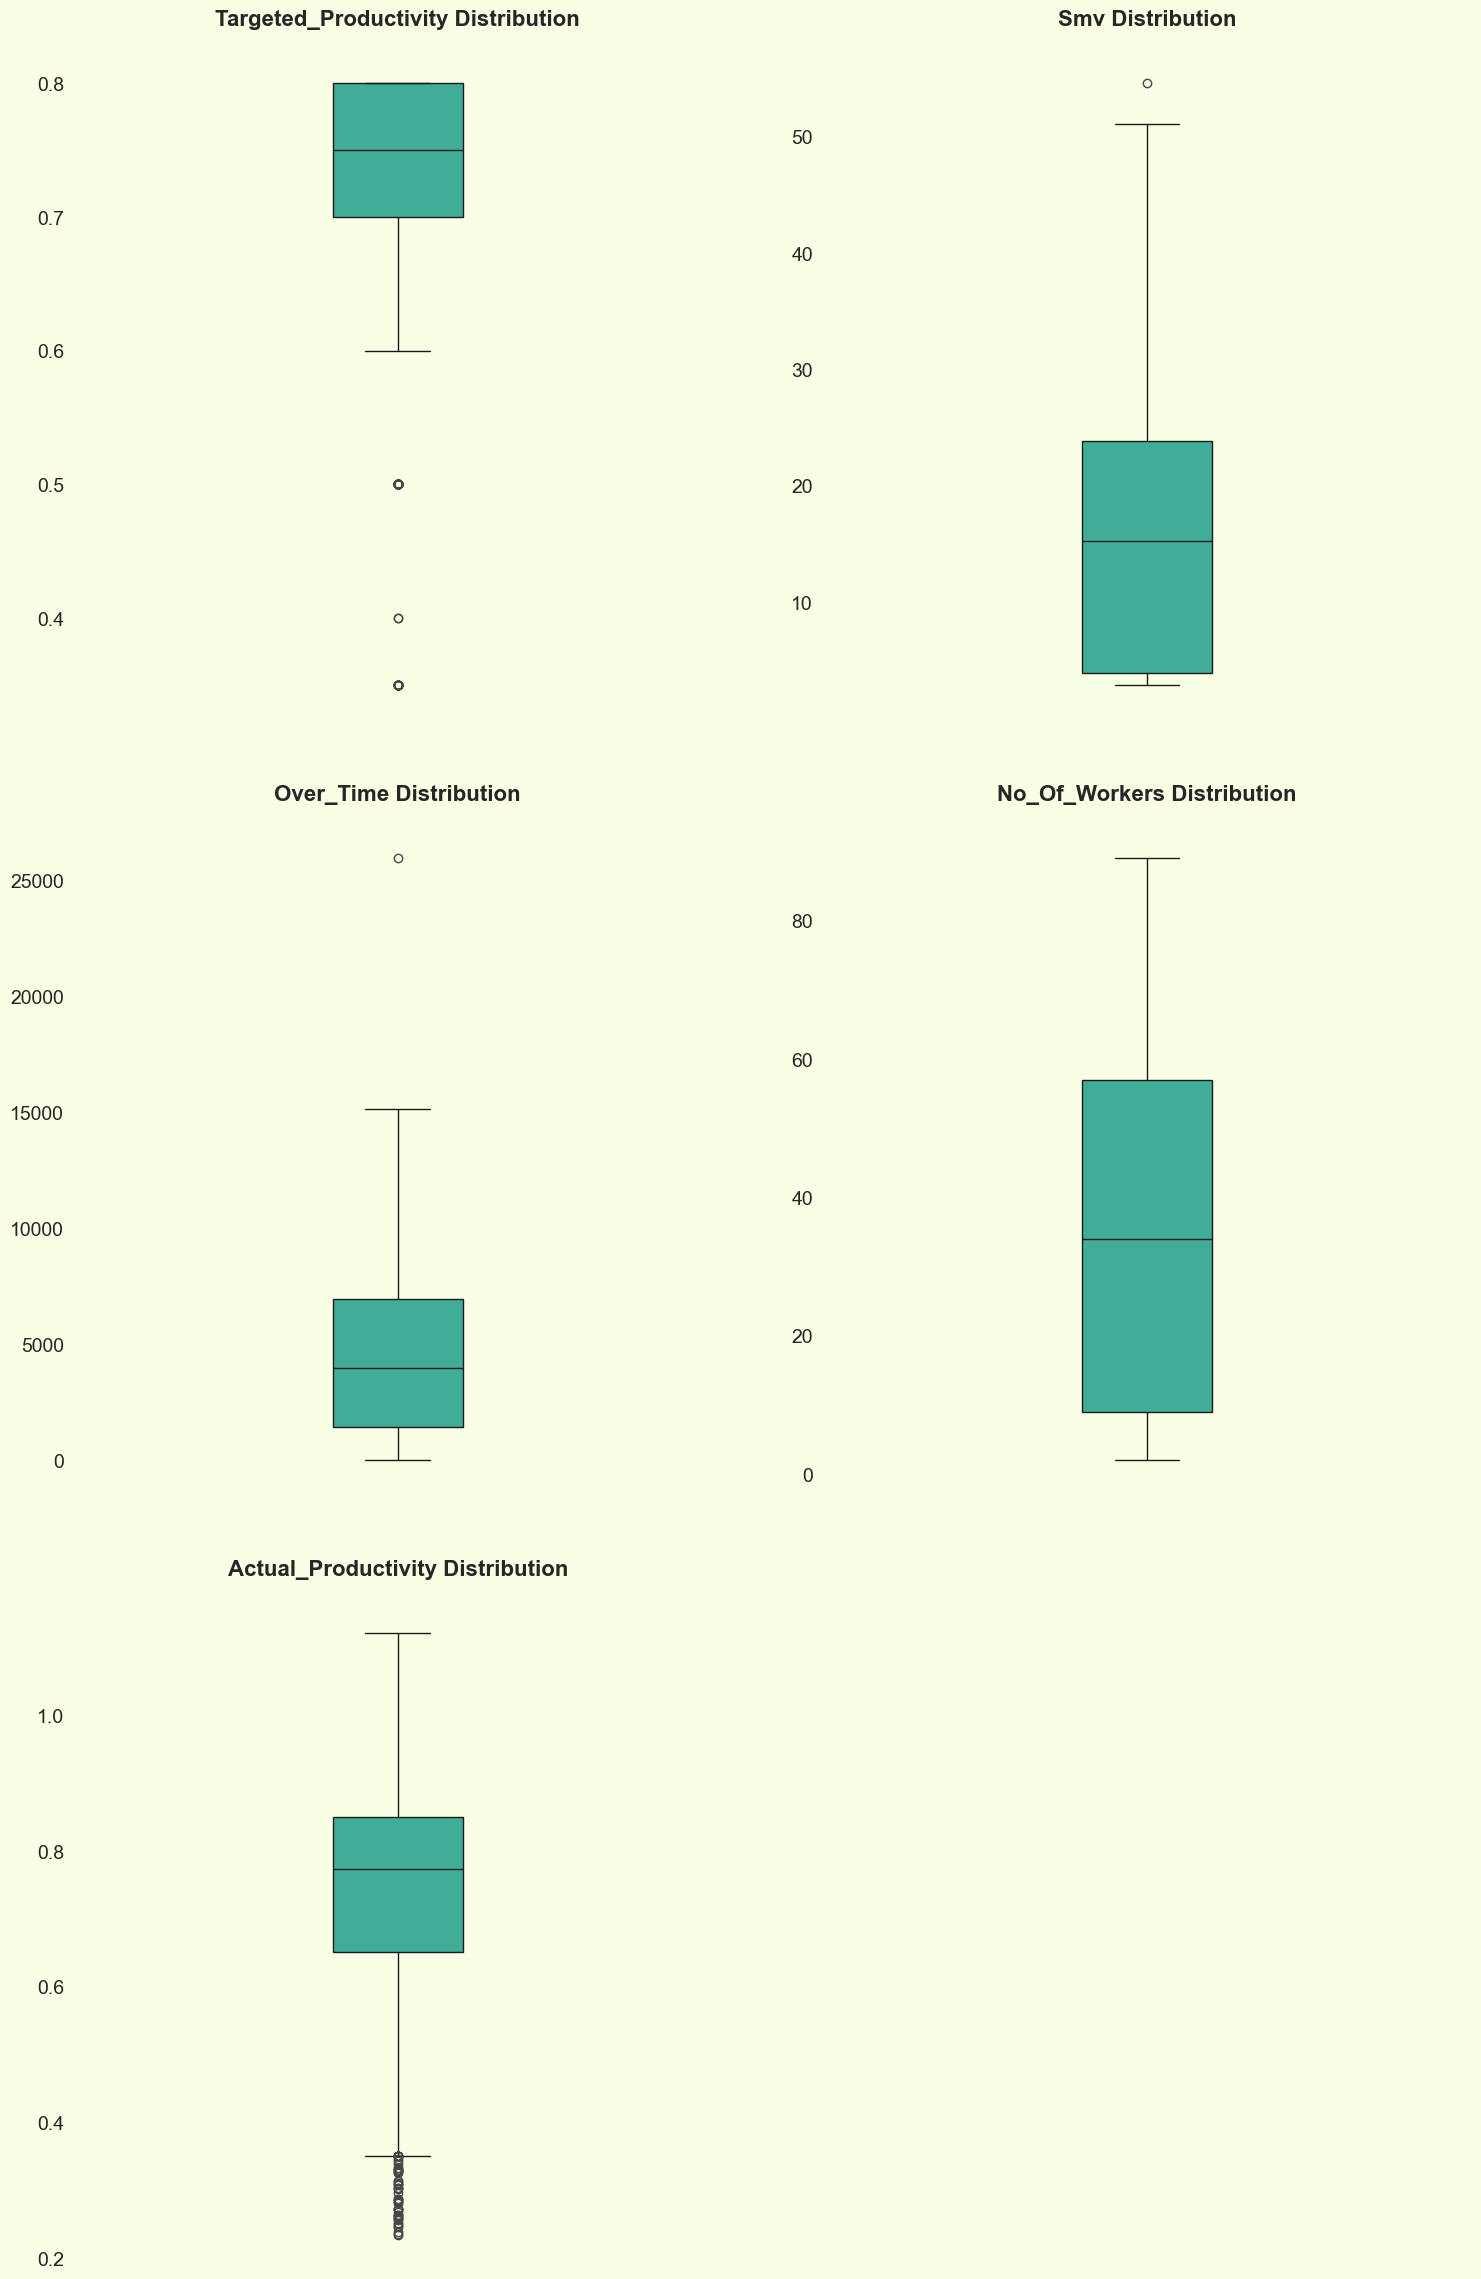

In [7]:
# Set visual style
sns.set_style("dark")
plt.rcParams["axes.facecolor"] = "#F8FFE5"
plt.rcParams["figure.facecolor"] = "#F8FFE5"
plt.rcParams["axes.edgecolor"] = "#F8FFE5"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelpad"] = 14

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(
        data=df, y=col, ax=ax, color='#2EBFA5', width=.2,
        boxprops=dict(edgecolor="#1a1a1a"),
        medianprops=dict(color="#1a1a1a"),
        whiskerprops=dict(color="#1a1a1a"),
        capprops=dict(color="#1a1a1a")
    )
    ax.set_title(f"{col.title()} Distribution", pad=20)
    ax.set_ylabel("")
    ax.set_xlabel("")

# Hide any unused axes
for j in range(5, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5)
plt.show()

### 📊 Distribution Analysis of Numerical Features

After visualizing the numerical columns using boxplots and computing descriptive statistics, here's an overview of each column:

---

#### 🎯 `targeted_productivity`
- **Range**: [0.35, 0.80] with very low standard deviation (`std ≈ 0.096`).
- **IQR**: 0.10 — tightly clustered values.
- **Outliers**: A few values below the lower bound 0.55, which indicates the presence of lower-end outliers in this column.

---

#### 🧵 `smv` (Standard Minute Value)
- **Range**: [2.9, 54.56], with a high standard deviation.
- **IQR**: 19.89 — relatively wide spread.
- **Outliers**: A few values exceed the upper bound (53.67), indicating mild outliers.

---

#### ⏱️ `over_time`
- **Range**: [0, 25920], with a large standard deviation (`std ≈ 3349`).
- **IQR**: 5497.5 — extremely wide spread.
- **Outliers**: Several values far exceed the upper bound (15,183.75), indicating strong positive skew.

---

#### 👷 `no_of_workers`
- **Range**: [2, 89], moderate spread.
- **IQR**: 48 — shows high variability.
- **Outliers**: Values beyond 129 would be outliers, but max is 89. No outliers detected.

---

#### ⚙️ `actual_productivity`
- **Range**: [0.2337, 1.1204], moderately spread.
- **IQR**: 0.1999 — reasonable distribution.
- **Outliers**: Max value slightly exceeds upper bound (1.15), indicating a mild outlier.


In [8]:
# Define the IQR bounds for each column
iqr_bounds = {
    'targeted_productivity': (0.55, 0.95),
    'smv': (-25.898750, 53.671250),
    'over_time': (-6806.250000, 15183.750000),
    'no_of_workers': (-63.000000, 129.000000),
    'actual_productivity': (0.350555, 1.150095)
}

# Drop rows with outliers
for col, (lower, upper) in iqr_bounds.items():
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print new shape
print("New shape after outlier removal:", df.shape)

New shape after outlier removal: (1078, 10)


### Outlier Removal

To ensure that the dataset is clean and the model is not influenced by extreme values, I performed outlier removal using the Interquartile Range (IQR) method. For each numerical feature, I calculated the lower and upper bounds as follows:

- **Lower Bound** = Q1 − 1.5 × IQR  
- **Upper Bound** = Q3 + 1.5 × IQR  

Any data point lying outside of these bounds was considered an outlier and removed from the dataset. This helps in reducing the skewness and variability caused by extreme values, which can negatively impact the performance and reliability of regression models.

After removing all rows that contained outliers in any of the numerical columns, the dataset was reduced to **1078 rows and 10 columns**:

**New shape after outliers removal: (1078, 10)**


## Categorical Distributions

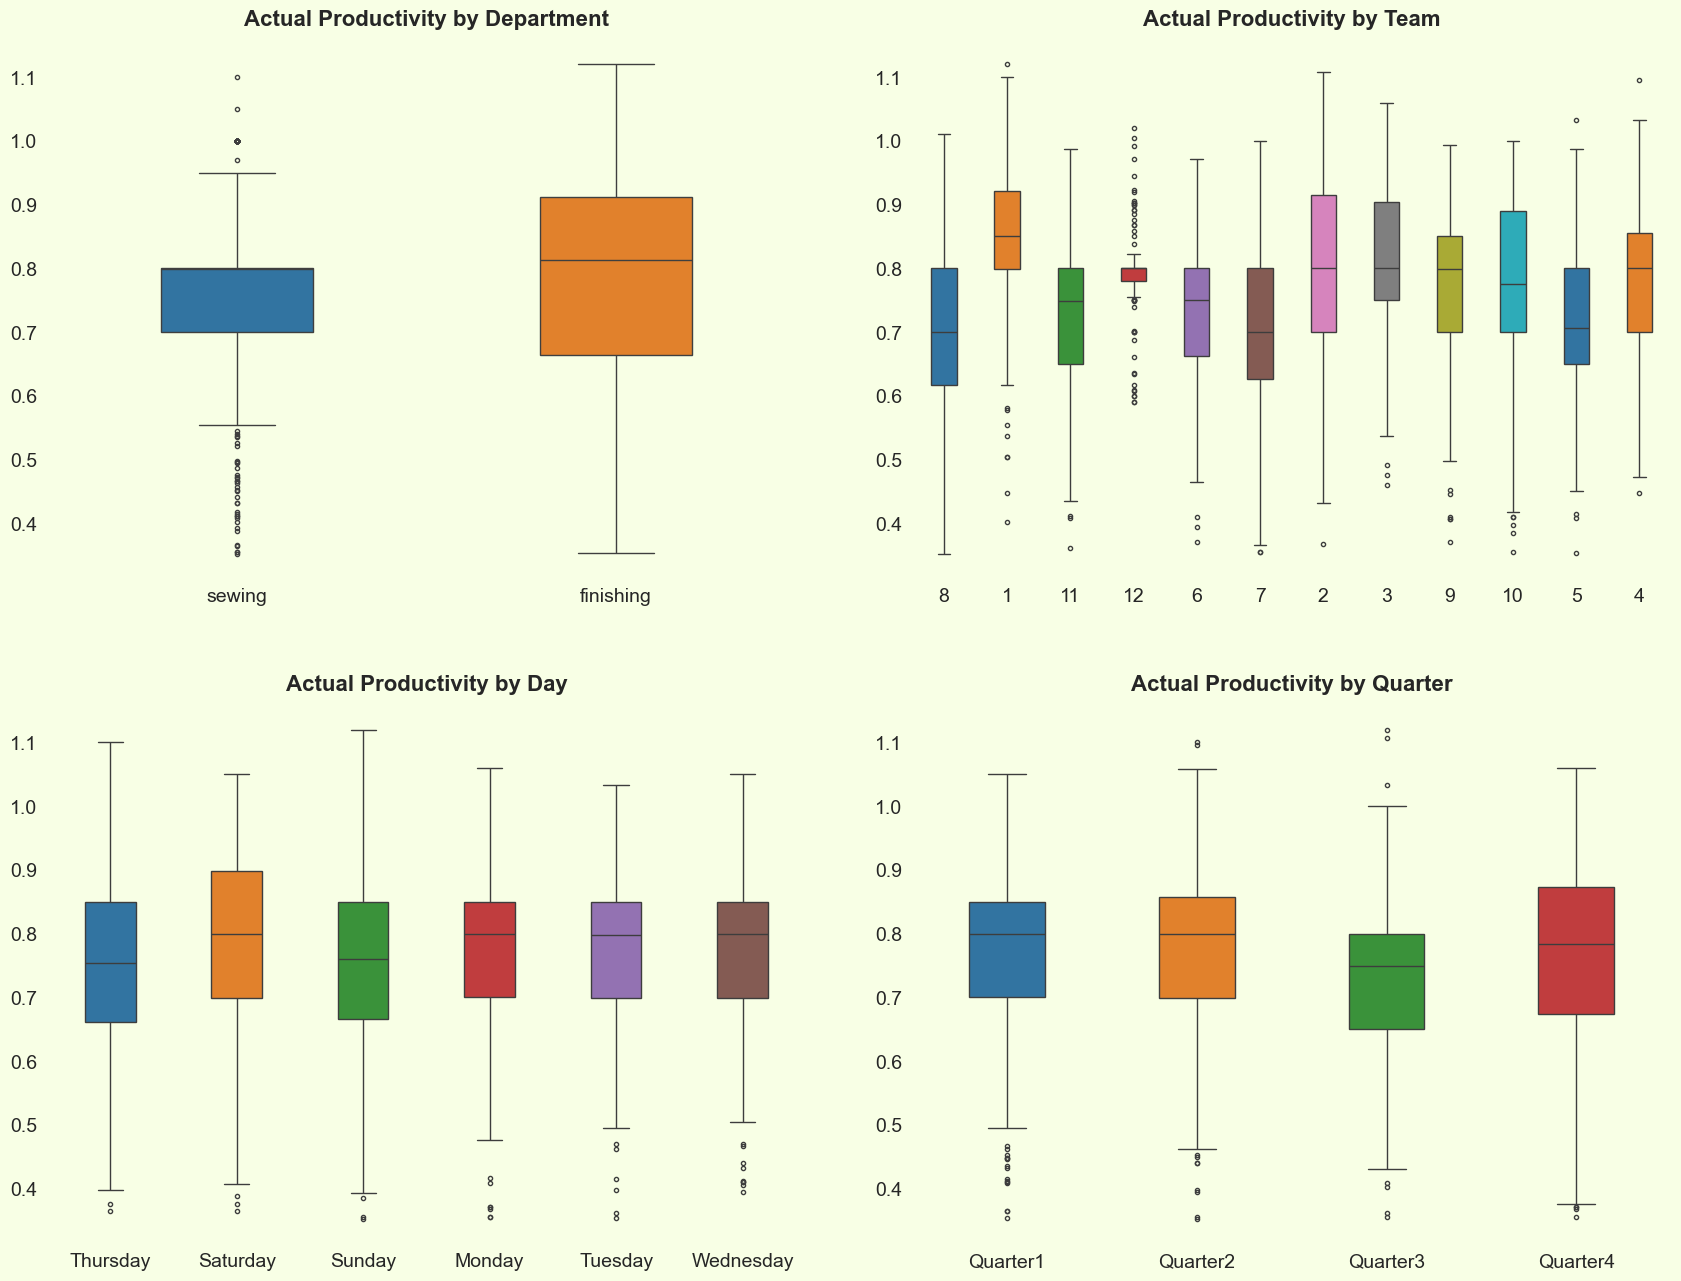

In [9]:
# Define the categorical columns to plot
categorical_columns = ['department', 'team', 'day', 'quarter']

# Set up subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

# Plot boxplots for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(
        data=df, 
        x=col, 
        y='actual_productivity', 
        ax=ax, 
        palette="tab10", 
        hue=col,
        width=0.4,
        fliersize=3,
        linewidth=1
    )
    
    # Title and axis labels
    ax.set_title(f'Actual Productivity by {col.title()}', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(pad=5)
plt.show()

In [10]:
# List to hold all summary DataFrames
summary_frames = []

# Compute descriptive stats for each categorical column
for col in categorical_columns:
    group_stats = (
        df.groupby(col)['actual_productivity']
        .describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        .reset_index()
        .assign(column=col)
        .rename(columns={'25%': 'Q1', '50%': 'median', '75%': 'Q3'})
    )
    summary_frames.append(group_stats)

# Combine into one DataFrame
summary_df = pd.concat(summary_frames, ignore_index=True)

# Reorder columns
summary_df = summary_df[['column', col] + [c for c in summary_df.columns if c not in ['column', col]]]

# Display the summary DataFrame
display(summary_df)

,column,quarter,department,count,mean,std,min,Q1,median,Q3,max,team,day
0,department,NaN,finishing,453.0,0.778488,0.168299,0.354444,0.664583,0.813371,0.912037,1.120437,NaN,NaN
1,department,NaN,sewing,625.0,0.754777,0.118693,0.353260,0.700355,0.799963,0.800535,1.100484,NaN,NaN
2,team,NaN,NaN,99.0,0.837632,0.134748,0.403242,0.800117,0.850502,0.922206,1.120437,1,NaN
3,team,NaN,NaN,92.0,0.754934,0.163472,0.355428,0.700058,0.775688,0.889907,0.999995,10,NaN
4,team,NaN,NaN,76.0,0.723595,0.131550,0.362667,0.650281,0.750050,0.800530,0.987880,11,NaN
5,team,NaN,NaN,95.0,0.796595,0.088421,0.590617,0.780986,0.800402,0.800848,1.020000,12,NaN
6,team,NaN,NaN,99.0,0.809453,0.151224,0.368719,0.700623,0.800594,0.915946,1.108125,2,NaN
7,team,NaN,NaN,87.0,0.819087,0.120321,0.460579,0.750243,0.800513,0.904209,1.059621,3,NaN
8,team,NaN,NaN,95.0,0.784979,0.129147,0.447917,0.700603,0.800435,0.856063,1.096633,4,NaN
9,team,NaN,NaN,79.0,0.729297,0.140134,0.354444,0.650055,0.707446,0.800980,1.033570,5,NaN


### 📊 Summary Analysis of `actual_productivity` by Categorical Groups

The graph and the table above reflect and visualize key distribution statistics of `actual_productivity` segmented by various categorical features: `department`, `team`, `day`, and `quarter`. The purpose of this breakdown is to uncover potential relationships between these groupings and the performance levels of production lines.

---

#### 🏢 Department

- **Finishing (n=453)**  
  - Highest average productivity: **0.778**
  - Also shows the highest **maximum** value at **1.120**
  - Higher dispersion (`std=0.168`) suggests more variability in productivity across this group.

- **Sewing (n=625)**  
  - Lower mean productivity: **0.755**
  - More concentrated productivity range (`std=0.119`), indicating more consistent performance.

✅ *Insight:* The finishing department tends to outperform sewing, but with slightly higher variability.

---

#### 👥 Team

- Teams 1, 2, 3 show notably **higher means** (≥ 0.809), suggesting stronger performers.
- Teams 6, 7, 8, 11, 12 show lower mean values (≤ 0.725), with Team 12 being the lowest (**mean = 0.701**).
- Several teams (e.g. 1, 2, 3) also demonstrate high max values (≥ 1.10), suggesting peak performers exist within those groups.

✅ *Insight:* There's a clear performance gap between teams, with some showing higher productivity and consistency. This could reflect differences in leadership, training, or experience.

---

#### 📆 Day of the Week

- **Saturday (n=170)** and **Monday (n=179)** yield the **highest means**, both around **0.771–0.780**.
- **Thursday** and **Sunday** show slightly lower averages (~0.749–0.753).
- Variability (`std`) is consistent across days (~0.13–0.15), implying no dramatic fluctuations.

✅ *Insight:* Weekends (especially Saturday) appear to slightly outperform midweek days, perhaps due to different staffing patterns or shifts.

---

#### 🗓️ Quarter

- **Q1 and Q2** exhibit the **highest productivity** means (≥ 0.773), coupled with high upper bounds.
- **Q3** has the **lowest mean** (**0.741**) and the **lowest median**, indicating a drop in performance during this period.
- **Q4** shows intermediate performance with the **highest variability** (`std=0.162`).

✅ *Insight:* Seasonal factors could influence productivity. Performance dips in Q3 may relate to holidays, weather, or staffing constraints.


## Creating and Analyzing the Binary Productivity Target

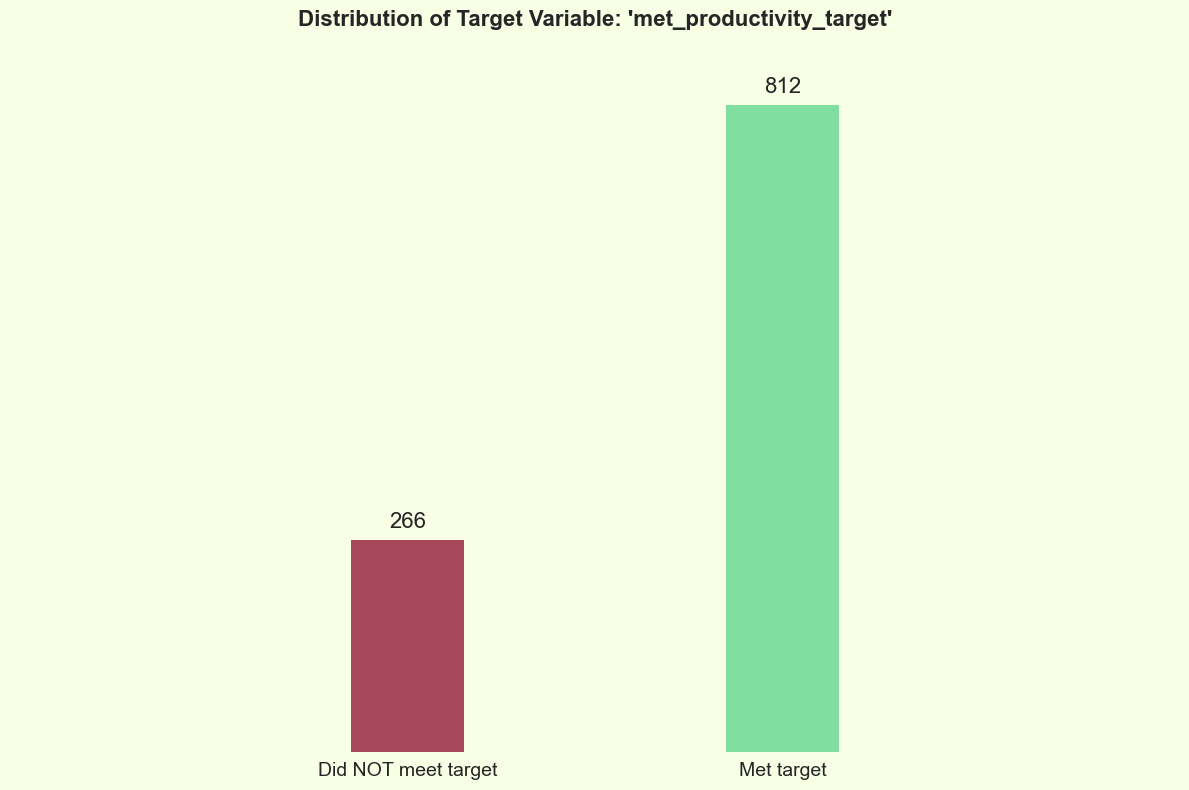

In [11]:
# Create binary target column
df['met_productivity_target'] = (df['actual_productivity'] >= df['targeted_productivity']).astype(int)

# Calculate value counts
target_counts = df['met_productivity_target'].value_counts().sort_index()

# Create a figure for the bar chart
plt.figure(figsize=(12, 8))

# Create a bar plot with custom colors
ax = sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    hue=target_counts.index,
    palette=["#B33951", "#70EE9C"],
    legend=False,
    width=0.3,
    edgecolor='none'
)

# Add title, remove x-axis label, adjust tick styles
ax.set_title("Distribution of Target Variable: 'met_productivity_target'")
ax.set_xlabel("")
plt.xticks([0, 1], ['Did NOT meet target', 'Met target'])
plt.yticks([], [])                      
plt.ylim(0, 900)
ax.margins(x=0.7)

# Add values on top of each bar
for index, value in enumerate(target_counts.values):
    ax.text(index, value + 10,   # Position text slightly above the bar
            f'{value:,}',        # Format value with commas
            ha='center',         # Center text horizontally
            va='bottom',         # Align text to the bottom
            fontsize=16)         # Font size

# Remove grid borders
sns.despine(bottom=True, left=True)

# Display the plot
plt.tight_layout()
plt.show()

### Creating a New Target Column: `met_productivity_target`

To prepare for building a classification tree model, I created a new binary target column called `met_productivity_target`. This column indicates whether the actual productivity met or exceeded the targeted productivity for each record.

- **Why create this column?**  
  Since the goal is to predict if productivity targets are achieved, this binary target simplifies the problem into a classification task. Instead of predicting continuous productivity values, the model will learn to classify records as either meeting the target (`1`) or not (`0`).

- **How is it created?**  
  The column was generated by comparing `actual_productivity` to `targeted_productivity`. If actual productivity is greater than or equal to the target, the value is set to `1`; otherwise, it is `0`.

### Distribution of the New Target

The distribution of `met_productivity_target` is as follows:

| Value | Count |
|-------|--------|
| 1     | 812    |
| 0     | 266    |

This shows that the majority of records (approximately 75%) met or exceeded their productivity targets, while about 25% did not. The class imbalance is moderate and will be considered during model training to ensure balanced performance.

This binary target will be used as the outcome variable in the upcoming classification tree modeling phase.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1078 non-null   datetime64[ns]
 1   quarter                  1078 non-null   object        
 2   department               1078 non-null   object        
 3   day                      1078 non-null   object        
 4   team                     1078 non-null   object        
 5   targeted_productivity    1078 non-null   float64       
 6   smv                      1078 non-null   float64       
 7   over_time                1078 non-null   int64         
 8   no_of_workers            1078 non-null   int64         
 9   actual_productivity      1078 non-null   float64       
 10  met_productivity_target  1078 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 92.8+ KB


In [13]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,met_productivity_target
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,7080,59,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960,8,0.886500,1
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,3660,30,0.800570,1
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,3660,30,0.800570,1
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1920,56,0.800382,1


In [14]:
df[df['targeted_productivity']<=df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,met_productivity_target
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,7080,59,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960,8,0.886500,1
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,3660,30,0.800570,1
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,3660,30,0.800570,1
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1920,56,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...
1068,2015-03-11,Quarter2,sewing,Wednesday,4,0.75,26.82,7080,59,0.750051,1
1069,2015-03-11,Quarter2,sewing,Wednesday,5,0.70,26.82,6960,58,0.700557,1
1070,2015-03-11,Quarter2,sewing,Wednesday,8,0.70,30.48,6840,57,0.700505,1
1071,2015-03-11,Quarter2,sewing,Wednesday,6,0.70,23.41,4560,38,0.700246,1


In [15]:
df[df['targeted_productivity']>df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,met_productivity_target
11,2015-01-01,Quarter1,sewing,Thursday,10,0.75,19.31,6480,54,0.712205,0
12,2015-01-01,Quarter1,sewing,Thursday,5,0.80,11.41,3660,30,0.707046,0
14,2015-01-01,Quarter1,finishing,Thursday,8,0.75,2.90,960,8,0.676667,0
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,2160,18,0.593056,0
16,2015-01-01,Quarter1,finishing,Thursday,7,0.80,2.90,960,8,0.540729,0
...,...,...,...,...,...,...,...,...,...,...,...
1073,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,960,8,0.628333,0
1074,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,960,8,0.625625,0
1075,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,960,8,0.625625,0
1076,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,15,0.505889,0
